In [1]:
# working on Win 11, Python 3.12.7, clean venv
#! pip install git+https://github.com/asche1/PyCrystalField.git@master

import numpy as np
import PyCrystalField as cef
import matplotlib.pyplot as plt

c:\Users\Timur\Documents\Python_Scripts\AI\Physics\venv\Lib\site-packages\PyCrystalField\PyCrystalField.py:596: SyntaxWarning: invalid escape sequence '\s'
  """Computes \sum_a |<|J_a|>|^2"""
c:\Users\Timur\Documents\Python_Scripts\AI\Physics\venv\Lib\site-packages\PyCrystalField\PyCrystalField.py:1673: SyntaxWarning: invalid escape sequence '\s'
  """Computes \sum_a |<|J_a|>|^2 = \sum_a |<|L_a + S_a|>|^2"""
c:\Users\Timur\Documents\Python_Scripts\AI\Physics\venv\Lib\site-packages\PyCrystalField\PyCrystalField.py:1681: SyntaxWarning: invalid escape sequence '\s'
  """Computes \sum_a |<|J_a|>|^2 = \sum_a |<|L_a + S_a|>|^2, including the
c:\Users\Timur\Documents\Python_Scripts\AI\Physics\venv\Lib\site-packages\PyCrystalField\PyCrystalField.py:1848: SyntaxWarning: invalid escape sequence '\c'
  """Computes susceptibility with


 *******************************************************
 *                PyCrystalField 2.3.11               *
 *  Please cite  J. Appl. Cryst. (2021). 54, 356-362   * 
 *    <https://doi.org/10.1107/S160057672001554X>      *
 *******************************************************



### The `importCIF` Function 💾

The `importCIF` function in the PyCrystalField library is a tool used to generate a point charge model for a crystal field calculation from a Crystallographic Information File (CIF). It automatically identifies the central magnetic ion and its neighboring ligands, calculates the crystal field parameters, and returns the necessary objects for further analysis. This function is particularly useful for studying rare-earth and some transition metal ions.

\<br\>

-----

### Parameters ⚙️

  * `ciffile` (str): The file path to the CIF file. This is the **only required parameter**.
  * `mag_ion` (str, optional): The symbol of the central magnetic ion (e.g., 'Nd' or 'Er'). If not provided, the function will attempt to identify the first rare-earth element in the CIF file's asymmetric unit cell and use it as the magnetic ion.
  * `Zaxis` (list or str, optional): The crystallographic direction to be used as the z-axis for the crystal field calculation. It can be a vector `[h, k, l]` or a string '100', '111', etc. If not specified, the function attempts to find an appropriate symmetry axis.
  * `Yaxis` (list or str, optional): The crystallographic direction for the y-axis, specified as a vector or string. This is typically used to define the coordinate system when the z-axis alone isn't sufficient.
  * `LS_Coupling` (float, optional): The spin-orbit coupling constant for the central ion in meV. If provided, the function will use this value instead of looking up a pre-defined value from its internal tables.
  * `crystalImage` (bool, optional): If `True`, the function will generate a 3D visualization of the crystal structure, showing the central ion and its neighbors.
  * `NumIonNeighbors` (int, optional): The number of neighboring ions to consider as ligands for the crystal field calculation. The function will use the closest `NumIonNeighbors` ions. The default value is 1.
  * `ForceImaginary` (bool, optional): If `True`, forces the inclusion of imaginary components in the crystal field parameters, even if the symmetry of the ligand environment suggests a real-only point charge model.
  * `ionL` (int, optional): The orbital angular momentum quantum number ($L$) for the central transition metal ion. This parameter is **required for transition metals**.
  * `ionS` (float, optional): The spin angular momentum quantum number ($S$) for the central transition metal ion. This parameter is **required for transition metals**.
  * `CoordinationNumber` (int, optional): An alternative to `NumIonNeighbors`. This specifies a specific coordination number. The function will select the `CoordinationNumber` closest ions.
  * `MaxDistance` (float, optional): Specifies the maximum distance (in angstroms) from the central ion to consider a neighboring atom as a ligand.

\<br\>

-----

### Return Values ⏎

The `importCIF` function returns one or two objects, depending on the number of unique magnetic ion sites identified in the CIF file:

  * **Single Site:**
      * `Lig` (object): An instance of the `Ligands` or `LS_Ligands` class, containing information about the central ion and its ligand environment (positions, names, etc.).
      * `PCM` (object): An instance of the `PointChargeModel` or `TMPointChargeModel` class, which holds the calculated crystal field parameters and allows for further analysis.
  * **Multiple Sites:**
      * `output` (list): A list of lists, where each inner list contains `[Lig, PCM]` for a different magnetic ion site. This occurs when the CIF file defines a magnetic ion with multiple, crystallographically distinct positions.

\<br\>

-----

### Usage Example 💻

```python
from pcf_lib.cif_import import importCIF
 
# For a rare-earth ion
ligands, cf_model = importCIF('ErSc3(BO3)4.cif')
 
# For a transition metal ion, specifying L and S
ligands_tm, cf_model_tm = importCIF('Li2Cu(SO4)2.cif', mag_ion='Cu', ionL=2, ionS=0.5)
```

### Import CIF + Eigen Vectors

In [2]:
import PyCrystalField as cef

Lig, CF = cef.importCIF(
    "DyO6.cif", "Ho1",
    CoordinationNumber=12,
    ligand_elements=["O"],           # считаем лигандами только кислороды
    charges_by_element={"O": -2},    # задаём заряды явно
    printB=False,                    # не печатать все B_k^q
    solution_index=0                 # если опций несколько — брать первую
)
CF.diagonalize()

unit cell: 10.0 10.0 10.0 90.0 90.0 90.0
Importing atoms
   7 atoms added
.cif import complete.
Central ion: Ho at [0.5, 0.5, 0.5]
    AAAH! There is a super-close atom. Removing it...
   Identified 12 O ligands.
    No mirror planes and no rotations in point group: ['x, y, z']
	Found a near-4-fold axis...  CSM= 1.8522815781099066e-29
    No charges found in cif file... guessing the O ligands are charged -2 ,
       and assuming the central ion has a 3+ charge: Ho3+

  Axes for point charge model (in ABC space):
        X axis = [-1.00000000e+00  1.00927633e-32  6.85805232e-17] 
        Y axis = [ 0.00000000e+00 -1.00000000e+00  1.47166612e-16] 
        Z axis = [6.85805232e-17 1.47166612e-16 1.00000000e+00] 

        we must inlcude the -m terms, and the eigenkets will be complex.



TypeError: cannot unpack non-iterable NoneType object

In [5]:
########### Import CIF file
ligands , Ho = cef.importCIF('data_Octa_FeO6.cif')

# Параметры: 
# .cif file
# mag_ion - Magnetic ion (automatically picks the first rare earth ion if none specified)
# NumIonNeighbours - optional, number of ion neighbours (default = 1)

########### print eigenvectors
Ho.printEigenvectors()

unit cell: 10.0 10.0 10.0 90.0 90.0 90.0
Importing atoms
   7 atoms added
.cif import complete.


TypeError: 'in <string>' requires string as left operand, not NoneType

## Объяснение 

![explain_importcif](explain_importcif.png)

Мы встретили вот эту рекурсию с двумя вариаблами (`ligands` , `Ho`) выходящими из одной команды (importCIF), потому что это правильно с точки зрения физики
- Из .cif файла он делает Point Charge Model (`ligands` class) через процесс "fit point charge" (не ебу что это)
- Из `ligands` class + CEF parameters из .cif = CEF Hamiltonian (`CFLevels` class или `Ho` - по названию mag_ion)


### LaTeX table

In [56]:
# LaTeX eigenvectors
latex_eigen = Ho.printLaTexEigenvectors()

In [55]:
from IPython.display import display, Markdown
import sys
import io
from IPython.display import display, Markdown

# Create a string buffer
captured_output = io.StringIO()

# Redirect stdout to the buffer
sys.stdout = captured_output

# Call the function that prints the LaTeX code
Ho.printLaTexEigenvectors()

# Restore stdout to its original state
sys.stdout = sys.__stdout__

# Get the value from the buffer
original_latex_string = captured_output.getvalue()

display(Markdown(original_latex_string))

\begin{table*}
\caption{Eigenvectors and Eigenvalues...}
\begin{ruledtabular}
\begin{tabular}{c|ccccccccccccccccc}
E (meV) &$|-8\rangle$ & $|-7\rangle$ & $|-6\rangle$ & $|-5\rangle$ & $|-4\rangle$ & $|-3\rangle$ & $|-2\rangle$ & $|-1\rangle$ & $|0\rangle$ & $|1\rangle$ & $|2\rangle$ & $|3\rangle$ & $|4\rangle$ & $|5\rangle$ & $|6\rangle$ & $|7\rangle$ & $|8\rangle$ \tabularnewline
 \hline 
0.000 & -0.0326 & -0.047 & -0.0461 & 0.1473 & 0.438 & 0.4461 & 0.2795 & 0.0463 & -0.0593 & -0.0463 & 0.2795 & -0.4461 & 0.438 & -0.1473 & -0.0461 & 0.047 & -0.0326 \tabularnewline
0.065 & -0.0272 & -0.0554 & -0.0366 & 0.1496 & 0.4162 & 0.4924 & 0.2349 & 0.0403 & 0.0 & 0.0403 & -0.2349 & 0.4924 & -0.4162 & 0.1496 & 0.0366 & -0.0554 & 0.0272 \tabularnewline
5.484 & -0.0353 & 0.0114 & 0.1507 & 0.3969 & 0.2658 & -0.135 & -0.3525 & -0.3068 & -0.1492 & 0.3068 & -0.3525 & 0.135 & 0.2658 & -0.3969 & 0.1507 & -0.0114 & -0.0353 \tabularnewline
5.631 & 0.0427 & -0.0145 & -0.1628 & -0.3713 & -0.3005 & 0.1446 & 0.3989 & 0.2515 & -0.0 & 0.2515 & -0.3989 & 0.1446 & 0.3005 & -0.3713 & 0.1628 & -0.0145 & -0.0427 \tabularnewline
16.560 & -0.1568 & 0.0371 & -0.3171 & -0.3222 & 0.0609 & 0.072 & -0.1324 & -0.23 & -0.617 & 0.23 & -0.1324 & -0.072 & 0.0609 & 0.3222 & -0.3171 & -0.0371 & -0.1568 \tabularnewline
16.782 & 0.0602 & -0.1292 & -0.1992 & -0.3344 & -0.0129 & 0.2093 & -0.1708 & -0.505 & 0.0 & -0.505 & 0.1708 & 0.2093 & 0.0129 & -0.3344 & 0.1992 & -0.1292 & -0.0602 \tabularnewline
17.839 & 0.5325 & -0.3137 & 0.2674 & 0.1245 & -0.1478 & 0.0945 & 0.015 & -0.0063 & -0.0 & -0.0063 & -0.015 & 0.0945 & 0.1478 & 0.1245 & -0.2674 & -0.3137 & -0.5325 \tabularnewline
18.154 & 0.5252 & -0.3559 & 0.1052 & -0.0569 & -0.1006 & 0.1713 & -0.0687 & -0.127 & -0.2141 & 0.127 & -0.0687 & -0.1713 & -0.1006 & 0.0569 & 0.1052 & 0.3559 & 0.5252 \tabularnewline
24.291 & 0.057 & -0.1338 & 0.0285 & -0.3298 & 0.2361 & 0.0467 & -0.3943 & 0.3948 & -0.0 & 0.3948 & 0.3943 & 0.0467 & -0.2361 & -0.3298 & -0.0285 & -0.1338 & -0.057 \tabularnewline
25.239 & 0.1205 & -0.0731 & -0.4778 & 0.1 & 0.0026 & -0.0817 & 0.1021 & -0.321 & 0.4935 & 0.321 & 0.1021 & 0.0817 & 0.0026 & -0.1 & -0.4778 & 0.0731 & 0.1205 \tabularnewline
25.732 & -0.1458 & -0.1418 & 0.1149 & -0.3217 & 0.1401 & 0.2184 & -0.3556 & -0.0459 & 0.5404 & 0.0459 & -0.3556 & -0.2184 & 0.1401 & 0.3217 & 0.1149 & 0.1418 & -0.1458 \tabularnewline
25.741 & 0.2795 & -0.0907 & -0.5481 & 0.1366 & 0.1674 & -0.2463 & 0.0481 & 0.0596 & 0.0 & 0.0596 & -0.0481 & -0.2463 & -0.1674 & 0.1366 & 0.5481 & -0.0907 & -0.2795 \tabularnewline
27.992 & -0.2143 & 0.0606 & 0.2486 & 0.0453 & -0.327 & 0.2415 & 0.2031 & -0.4237 & 0.0339 & 0.4237 & 0.2031 & -0.2415 & -0.327 & -0.0453 & 0.2486 & -0.0606 & -0.2143 \tabularnewline
32.263 & 0.3543 & 0.5436 & 0.1123 & -0.1681 & 0.1747 & -0.0276 & 0.0529 & -0.0636 & -0.0 & -0.0636 & -0.0529 & -0.0276 & -0.1747 & -0.1681 & -0.1123 & 0.5436 & -0.3543 \tabularnewline
32.452 & -0.3313 & -0.5209 & -0.1281 & 0.2083 & -0.1693 & 0.0107 & -0.0451 & 0.1512 & -0.1043 & -0.1512 & -0.0451 & -0.0107 & -0.1693 & -0.2083 & -0.1281 & 0.5209 & -0.3313 \tabularnewline
34.844 & 0.0584 & 0.2449 & -0.2171 & 0.2384 & -0.3165 & 0.3468 & -0.3093 & 0.1286 & 0.0 & 0.1286 & 0.3093 & 0.3468 & 0.3165 & 0.2384 & 0.2171 & 0.2449 & -0.0584 \tabularnewline
35.060 & -0.0765 & -0.263 & 0.2095 & -0.234 & 0.2617 & -0.3679 & 0.3086 & -0.1651 & -0.0072 & 0.1651 & 0.3086 & 0.3679 & 0.2617 & 0.234 & 0.2095 & 0.263 & -0.0765 \tabularnewline
\end{tabular}\end{ruledtabular}
\label{flo:Eigenvectors}
\end{table*}


In [32]:
# calculate magnetization at 2 K
temp = 2 #temperature in K

FieldStrengths = np.linspace(-10,10,101) 
magnetization = np.zeros((len (FieldStrengths), 3, 3))
ion='Ho3+'
for i, fs in enumerate (FieldStrengths):
    magnetization[i,0] = Ho.magnetization(ion, temp, [fs,0,0]) # field along X
    magnetization[i,1] = Ho.magnetization(ion, temp, [0,fs,0]) # field along Y
    magnetization[1,2] = Ho.magnetization(ion, temp, [0,0,fs]) # field along Z

In [34]:
# Calculate temperature dependent susceptibility in a 6.5 T field
Temperatures = np.arange(10, 300, 10)

# For powder average susceptibility, Field is a scalar
CalcSuscep = Ho.susceptibility(ion='Ho3+', Temps=Temperatures,
                               Field=[0.5, 0, 0], deltaField=0.001)

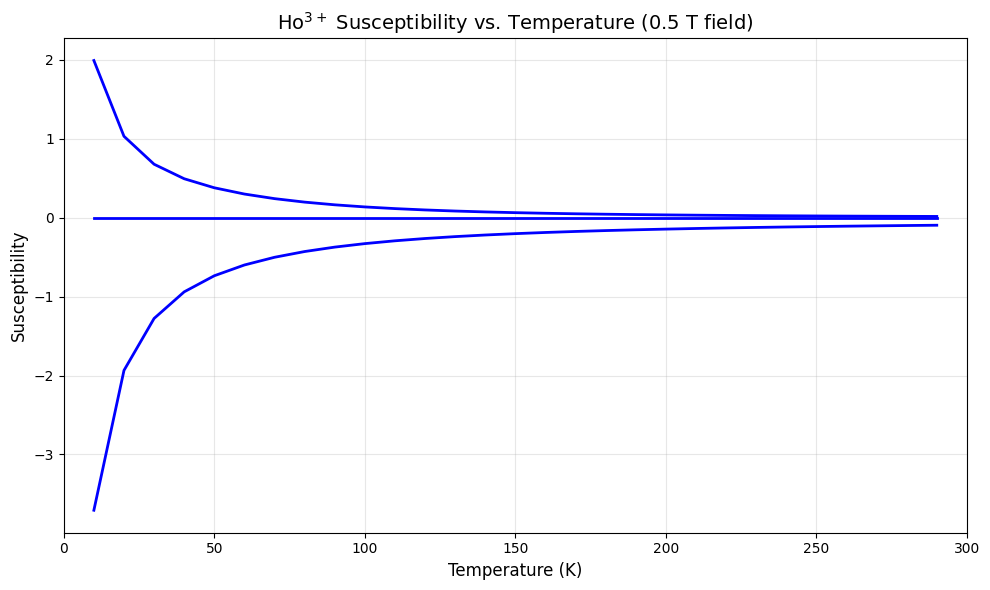

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate temperature dependent susceptibility in a 6.5 T field
Temperatures = np.arange(10, 300, 10)

# For powder average susceptibility, Field is a scalar
CalcSuscep = Ho.susceptibility(ion='Ho3+', Temps=Temperatures,
                               Field=[0.5, 0, 0], deltaField=0.001)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(Temperatures, CalcSuscep, 'b-', linewidth=2)
plt.xlabel('Temperature (K)', fontsize=12)
plt.ylabel('Susceptibility', fontsize=12)
plt.title('Ho$^{3+}$ Susceptibility vs. Temperature (0.5 T field)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim(0, 300)
plt.tight_layout()
plt.show()

In [37]:
import matplotlib.pyplot as plt
plt(CalcSuscep)

TypeError: 'module' object is not callable